In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
tf.__version__

'2.13.0'

In [9]:
fashion_mnist = tf.keras.datasets.fashion_mnist
type(fashion_mnist)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [14]:
print(type(train_images))
print(train_images.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)


In [15]:
train_labels.shape

(60000,)

In [17]:
print(train_labels)

[9 0 0 ... 3 0 5]


In [ ]:
# 0:T-shirt/top  1:Trouser 2:Pullover 3:Dress 4:Coat 5:Sandal 6:Shirt 7:Sneaker 8:Bag 9:Ankle boot

In [18]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

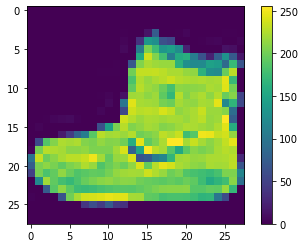

In [24]:
plt.figure()
plt.imshow(X=train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [25]:
train_images = train_images / 255.0
test_images = test_images / 255.0

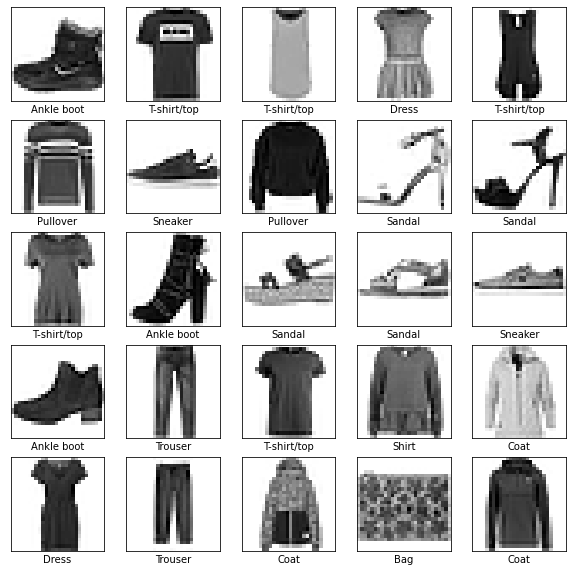

In [28]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10)
])

In [30]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [31]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5064 - accuracy: 0.8229
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3784 - accuracy: 0.8631
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3383 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3151 - accuracy: 0.8834
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2968 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2830 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2707 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2596 - accuracy: 0.9031
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2491 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.241

In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest Accuracy: ", test_acc)

313/313 - 0s - loss: 0.3422 - accuracy: 0.8806 - 301ms/epoch - 962us/step

Test Accuracy:  0.8805999755859375


In [33]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [36]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 645us/step


In [37]:
predictions[0]

array([1.9376425e-07, 6.9280247e-08, 2.7107376e-07, 2.4279773e-10,
       9.9978865e-07, 1.2153209e-03, 7.5118305e-07, 2.1874905e-02,
       2.0890948e-06, 9.7690535e-01], dtype=float32)

In [39]:
# en yüksek doğruluk oranına sahip sınıf
np.argmax(predictions[0])

9

In [40]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                          100 * np.max(predictions_array),
                                          class_names[true_label]), 
                                          color=color)
    
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

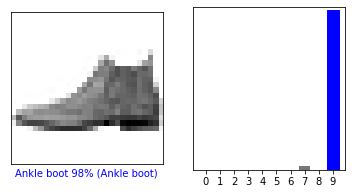

In [47]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

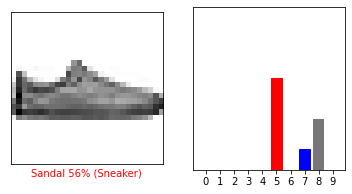

In [49]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

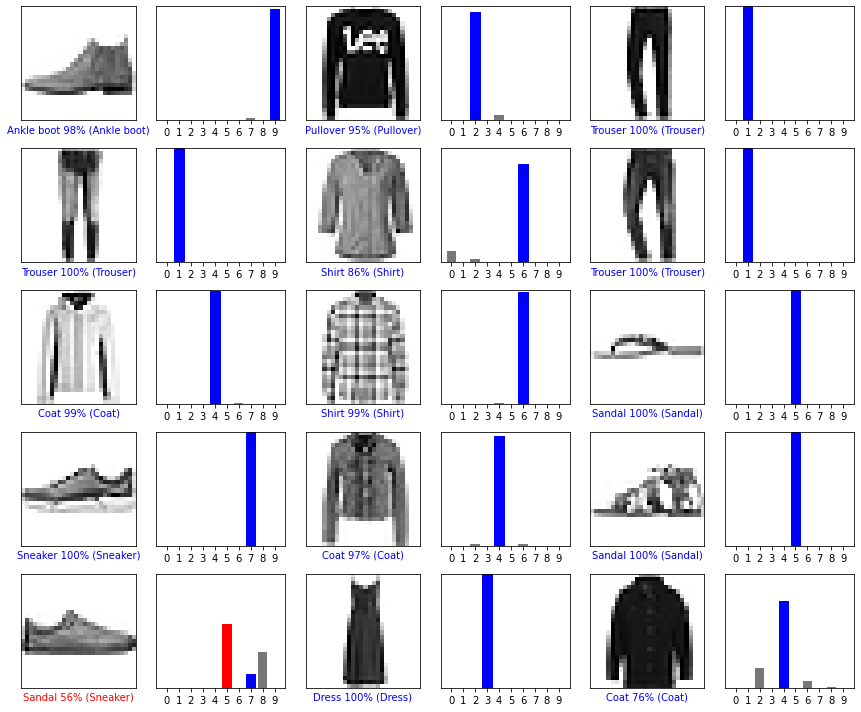

In [55]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [56]:
img = test_images[1]
print(img.shape)

(28, 28)


In [57]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [58]:
predictions_single = probability_model.predict(img)
predictions_single

1/1 [==============================] - 0s 15ms/step


array([[2.6448923e-05, 3.2156661e-14, 9.4827420e-01, 1.9817641e-07,
        4.5911465e-02, 2.5711386e-13, 5.7876962e-03, 9.7628774e-16,
        9.1700042e-10, 4.2770450e-16]], dtype=float32)

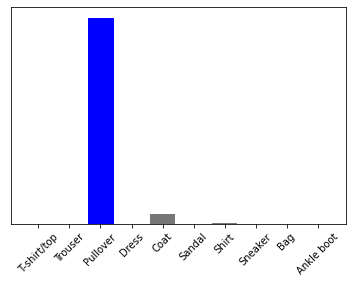

In [59]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [60]:
np.argmax(predictions_single[0])

2